<h3>Preprocessing</h3>

In [50]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import numpy as np
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

In [51]:
celestial_data = pd.read_csv('data/star_classification.csv')
celestial_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [52]:
celestial_data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [53]:
celestial_data.drop(columns = ['rerun_ID'], inplace = True)

In [54]:
celestial_data.isnull().any()

obj_ID         False
alpha          False
delta          False
u              False
g              False
r              False
i              False
z              False
run_ID         False
cam_col        False
field_ID       False
spec_obj_ID    False
class          False
redshift       False
plate          False
MJD            False
fiber_ID       False
dtype: bool

In [55]:
celestial_data = celestial_data[celestial_data['class'] != 'QSO']
celestial_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [56]:
celestial_data['class'].unique()

array(['GALAXY', 'STAR'], dtype=object)

In [57]:
celestial_data.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [58]:
celestial_data['class'] = celestial_data['class'].map({'GALAXY': 0, 'STAR': 1})
celestial_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,6.891865e+18,0,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,2,581,1.055431e+19,0,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,1,289,8.586351e+18,0,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,4,308,3.112008e+18,0,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,0,0.455040,6751,56368,470


In [59]:
print(f'Galaxy count: {celestial_data["class"].value_counts()[0]} galaxies')
print(f'Star count: {celestial_data["class"].value_counts()[1]} stars')

Galaxy count: 59445 galaxies
Star count: 21594 stars


In [60]:
indices = celestial_data[celestial_data['class'] == 0].index
drop = np.random.choice(indices, 60000)
celestial_data.drop(drop, inplace = True)

print(f'Galaxy count: {celestial_data["class"].value_counts()[0]} galaxies')
print(f'Star count: {celestial_data["class"].value_counts()[1]} stars')

Galaxy count: 21621 galaxies
Star count: 21594 stars


In [61]:
for col in celestial_data.columns:
    if col != 'class':
        celestial_data[np.abs(stats.zscore(celestial_data[col])) < 3]
celestial_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,6.543777e+18,0,0.634794,5812,56354,171
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,5.152200e+18,0,0.644195,4576,55592,299
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,2,346,6.961443e+18,0,0.477009,6183,56210,15
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,4,122,2.751763e+18,1,-0.000008,2444,54082,232
10,1.237680e+18,328.092076,18.220310,25.77163,22.52042,20.63884,19.78071,19.05765,8102,3,27,5.652162e+18,0,0.459596,5020,55852,525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99983,1.237661e+18,211.742368,43.889079,23.24795,23.38202,21.61254,20.49543,19.83544,3699,3,148,9.573705e+18,0,0.597535,8503,57519,647
99984,1.237661e+18,217.316578,42.325055,25.36042,22.32818,20.52005,19.41139,18.88105,3699,3,177,6.823167e+18,0,0.548908,6060,56074,777
99988,1.237679e+18,20.029463,11.414399,22.30954,23.98841,21.82823,20.49596,19.59701,7787,2,333,1.246831e+19,0,0.612791,11074,58488,339
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,4,131,7.601080e+18,0,0.455040,6751,56368,470


In [62]:
sc = StandardScaler()
features = celestial_data.columns[celestial_data.columns != 'class']
celestial_data[features] = sc.fit_transform(celestial_data[features])

celestial_data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,-0.413473,-0.415121,0.455163,0.046499,0.046621,0.580400,0.266185,0.013260,-0.413372,-0.955686,-0.702137,0.439078,0,1.510611,0.439103,0.617403,-0.982167
2,-0.413473,-0.348372,0.610762,0.075180,0.054675,0.690483,0.369239,0.016465,-0.413372,-0.955686,-0.432148,-0.002707,0,1.544033,-0.002696,0.179845,-0.498516
7,1.727702,-1.752808,-0.574305,0.012747,0.041365,0.552847,0.447791,0.014427,1.727791,-0.955686,1.056085,0.571675,0,0.949658,0.571715,0.534715,-1.571617
9,0.782876,-1.406550,0.233854,0.002324,0.000186,-0.044721,0.070324,0.010367,0.782843,0.292858,-0.418978,-0.764776,1,-0.746223,-0.764764,-0.687232,-0.751677
10,1.896817,1.560795,-0.264140,0.085716,0.051701,0.705390,0.612805,0.018734,1.896844,-0.331414,-1.044562,0.156016,0,0.887751,0.156009,0.329143,0.355431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99983,-0.365621,0.365921,1.029345,0.033428,0.069560,1.204521,1.015642,0.034864,-0.365585,-0.331414,-0.247765,1.400992,0,1.378149,1.400982,1.286373,0.816411
99984,-0.365621,0.423166,0.950531,0.077197,0.047717,0.644497,0.404646,0.015071,-0.365585,-0.331414,-0.056797,0.527776,0,1.205273,0.527749,0.456620,1.307620
99988,1.734896,-1.602908,-0.607099,0.013985,0.082128,1.315087,1.015940,0.029919,1.734985,-0.955686,0.970479,2.319944,0,1.432388,2.319967,1.842795,-0.347375
99998,-0.390735,0.371325,1.168994,0.076989,0.033403,0.333756,0.213660,0.009758,-0.390763,0.292858,-0.359712,0.774741,0,0.871553,0.774742,0.625442,0.147612


<h3>Visualizations</h3>

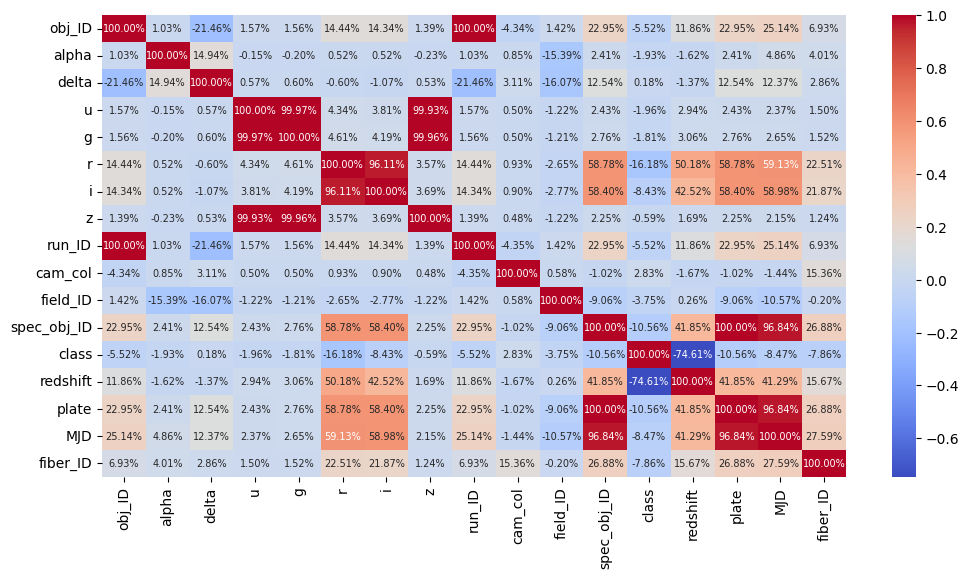

In [63]:
plt.figure(figsize = (12, 6))
sb.heatmap(data = celestial_data.corr(), annot = True, fmt = '.2%', annot_kws = {'size': 7}, cmap = 'coolwarm')
plt.show()

<h3>Modeling</h3>

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Current running model: GaussianNB()
Score: 0.604313217326916
Cross Validation Scores: [0.60303135 0.60291565 0.613213   0.98970265 0.62142774]
Confusion Matrix:


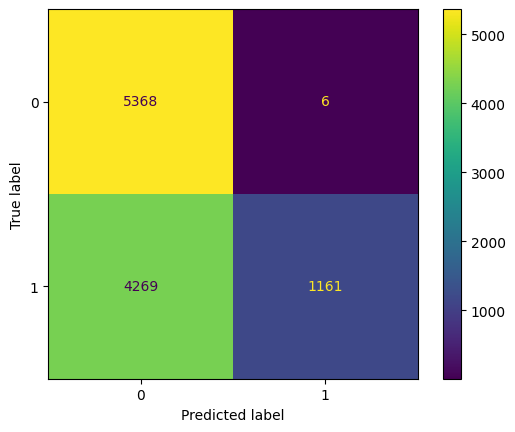

Classification Report:
              precision    recall  f1-score   support

      Galaxy       0.56      1.00      0.72      5374
        Star       0.99      0.21      0.35      5430

    accuracy                           0.60     10804
   macro avg       0.78      0.61      0.53     10804
weighted avg       0.78      0.60      0.53     10804

----------------------
Current running model: DecisionTreeClassifier()
Score: 0.9970381340244354
Cross Validation Scores: [0.99826449 0.99780169 0.99861159 0.99745459 0.99745459]
Confusion Matrix:


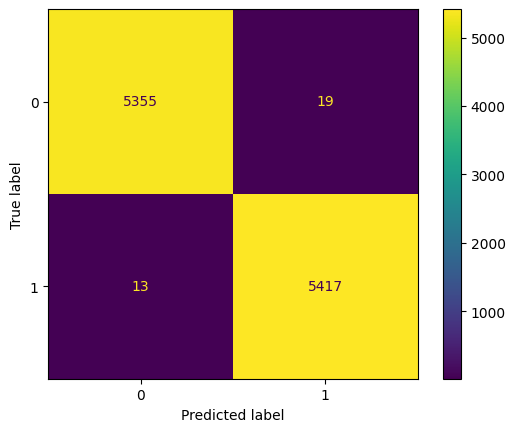

Classification Report:
              precision    recall  f1-score   support

      Galaxy       1.00      1.00      1.00      5374
        Star       1.00      1.00      1.00      5430

    accuracy                           1.00     10804
   macro avg       1.00      1.00      1.00     10804
weighted avg       1.00      1.00      1.00     10804

----------------------
Current running model: RandomForestClassifier()
Score: 0.994816734542762
Cross Validation Scores: [0.99699179 0.99722319 0.99676038 0.99548768 0.99629758]
Confusion Matrix:


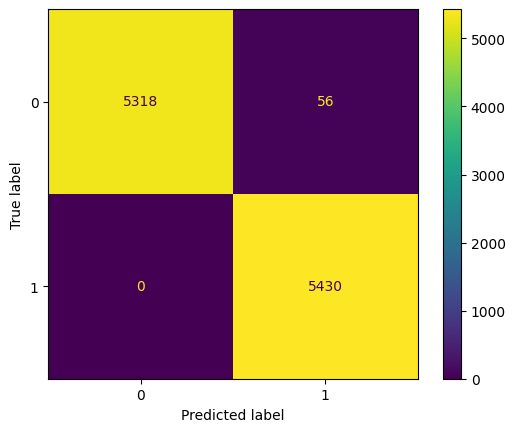

Classification Report:
              precision    recall  f1-score   support

      Galaxy       1.00      0.99      0.99      5374
        Star       0.99      1.00      0.99      5430

    accuracy                           0.99     10804
   macro avg       0.99      0.99      0.99     10804
weighted avg       0.99      0.99      0.99     10804

----------------------
Current running model: KNeighborsClassifier()
Score: 0.9500185116623473
Cross Validation Scores: [0.93416638 0.93254657 0.93335647 0.93358787 0.92560454]
Confusion Matrix:


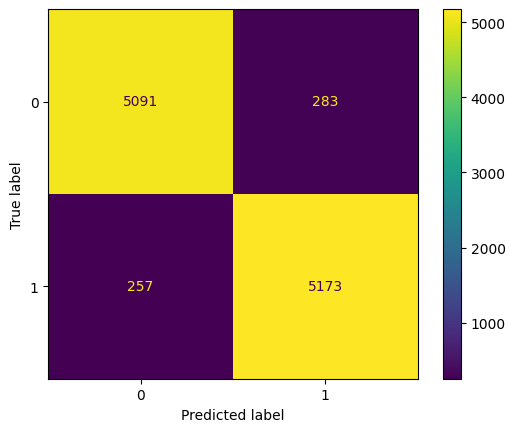

Classification Report:
              precision    recall  f1-score   support

      Galaxy       0.95      0.95      0.95      5374
        Star       0.95      0.95      0.95      5430

    accuracy                           0.95     10804
   macro avg       0.95      0.95      0.95     10804
weighted avg       0.95      0.95      0.95     10804

----------------------
Current running model: LogisticRegression()
Score: 0.987319511292114
Cross Validation Scores: [0.98970265 0.98981835 0.99097536 0.98681014 0.98970265]
Confusion Matrix:


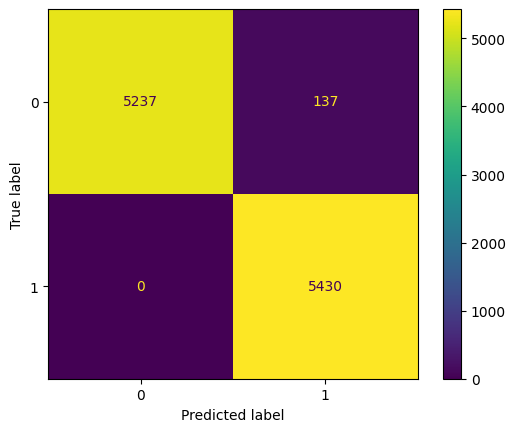

Classification Report:
              precision    recall  f1-score   support

      Galaxy       1.00      0.97      0.99      5374
        Star       0.98      1.00      0.99      5430

    accuracy                           0.99     10804
   macro avg       0.99      0.99      0.99     10804
weighted avg       0.99      0.99      0.99     10804

----------------------


In [65]:
nb = GaussianNB()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
logreg = LogisticRegression()

models = [nb, dtc, rf, knn, logreg]

X = celestial_data.drop(columns = ['class'], axis = 1)
y = celestial_data['class']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

rus = RandomUnderSampler()
smote = SMOTE()

x_train, y_train = rus.fit_resample(x_train, y_train)
x_train, y_train = smote.fit_resample(x_train, y_train)

accuracies = []

for model in models:
    print(f'Current running model: {model}')
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = model.score(x_test, y_test) 
    accuracies.append(score)
    print(f'Score: {score}')
    print(f'Cross Validation Scores: {cross_val_score(estimator = model, X = X, y = y)}')
    print(f'Confusion Matrix:')
    cf = confusion_matrix(y_test, pred)
    ConfusionMatrixDisplay(cf).plot()
    plt.show()
    print('Classification Report:')
    print(classification_report(y_test, pred, target_names = ['Galaxy', 'Star']))
    print('----------------------')

([<matplotlib.axis.XTick at 0x7fbacc4ab590>,
 [Text(0, 0, 'NB'),
  Text(1, 0, 'DT'),
  Text(2, 0, 'RF'),
  Text(3, 0, 'KNN'),
  Text(4, 0, 'LGR')])

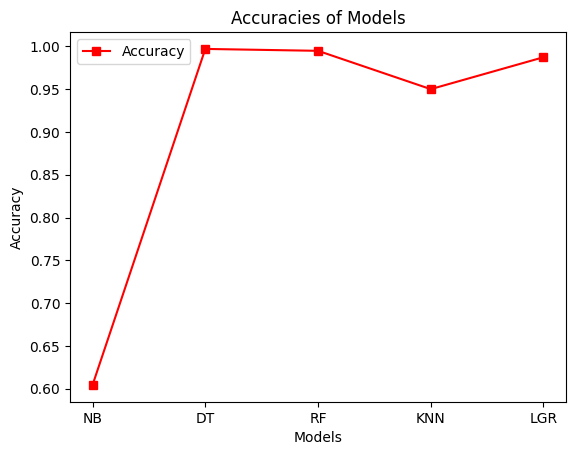

In [66]:
plt.plot(accuracies, marker = 's', color = 'red')
plt.title('Accuracies of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = ['NB', 'DT', 'RF', 'KNN', 'LGR'])